In [9]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from tensorflow.keras.applications import ResNet50

In [10]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [11]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

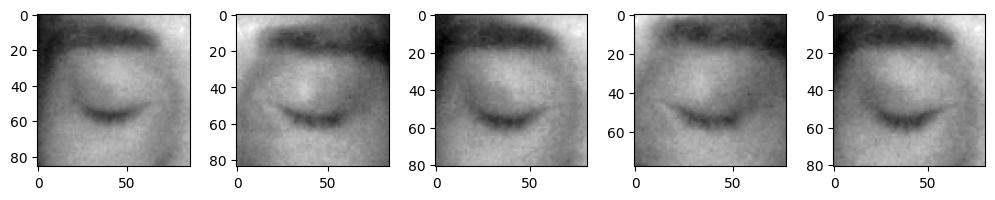

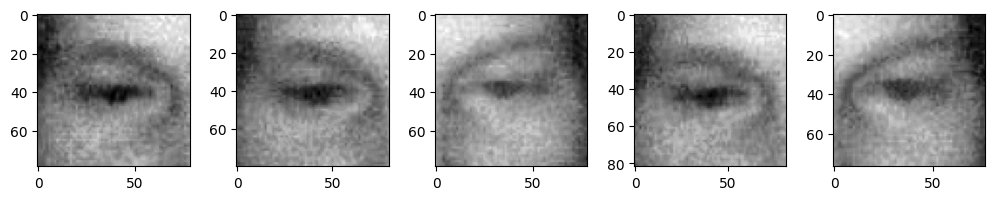

In [12]:
data_path = 'train'

directories = ['/Closed', '/Open']

for j in directories:
    plot_imgs(data_path+j)

In [13]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
train_data_path = 'train'
test_data_path = 'test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (32,32),
                                              batch_size = batch_size, 
                                              color_mode = 'rgb',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (32,32),
                                              batch_size = batch_size, 
                                              color_mode = 'rgb',
                                              class_mode = 'categorical')

Found 81675 images belonging to 2 classes.
Found 3223 images belonging to 2 classes.


In [15]:
classes = 2

model = Sequential()

model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model.add(Dense(2, activation='sigmoid'))

model.layers[0].trainable = False 

print(model.summary())

94765736/94765736 [==============================] - 45s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [16]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
model_path="yawn_detectionResnet50.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [18]:
num_epochs = 25
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [19]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/25
638/638 [==============================] - ETA: 0s - loss: 0.5585 - accuracy: 0.7414
Epoch 1: val_accuracy improved from -inf to 0.78906, saving model to yawn_detectionResnet50.h5
638/638 [==============================] - 109s 155ms/step - loss: 0.5585 - accuracy: 0.7414 - val_loss: 0.5352 - val_accuracy: 0.7891
Epoch 2/25
638/638 [==============================] - ETA: 0s - loss: 0.4574 - accuracy: 0.8042
Epoch 2: val_accuracy did not improve from 0.78906
638/638 [==============================] - 97s 151ms/step - loss: 0.4574 - accuracy: 0.8042 - val_loss: 0.5396 - val_accuracy: 0.7791
Epoch 3/25
638/638 [==============================] - ETA: 0s - loss: 0.4306 - accuracy: 0.8196
Epoch 3: val_accuracy improved from 0.78906 to 0.83125, saving model to yawn_detectionResnet50.h5
638/638 [==============================] - 95s 149ms/step - loss: 0.4306 - accuracy: 0.8196 - val_loss: 0.4942 - val_accuracy: 0.8313
Epoch 4/25
638/638 [==============================] - ETA: 0s - l

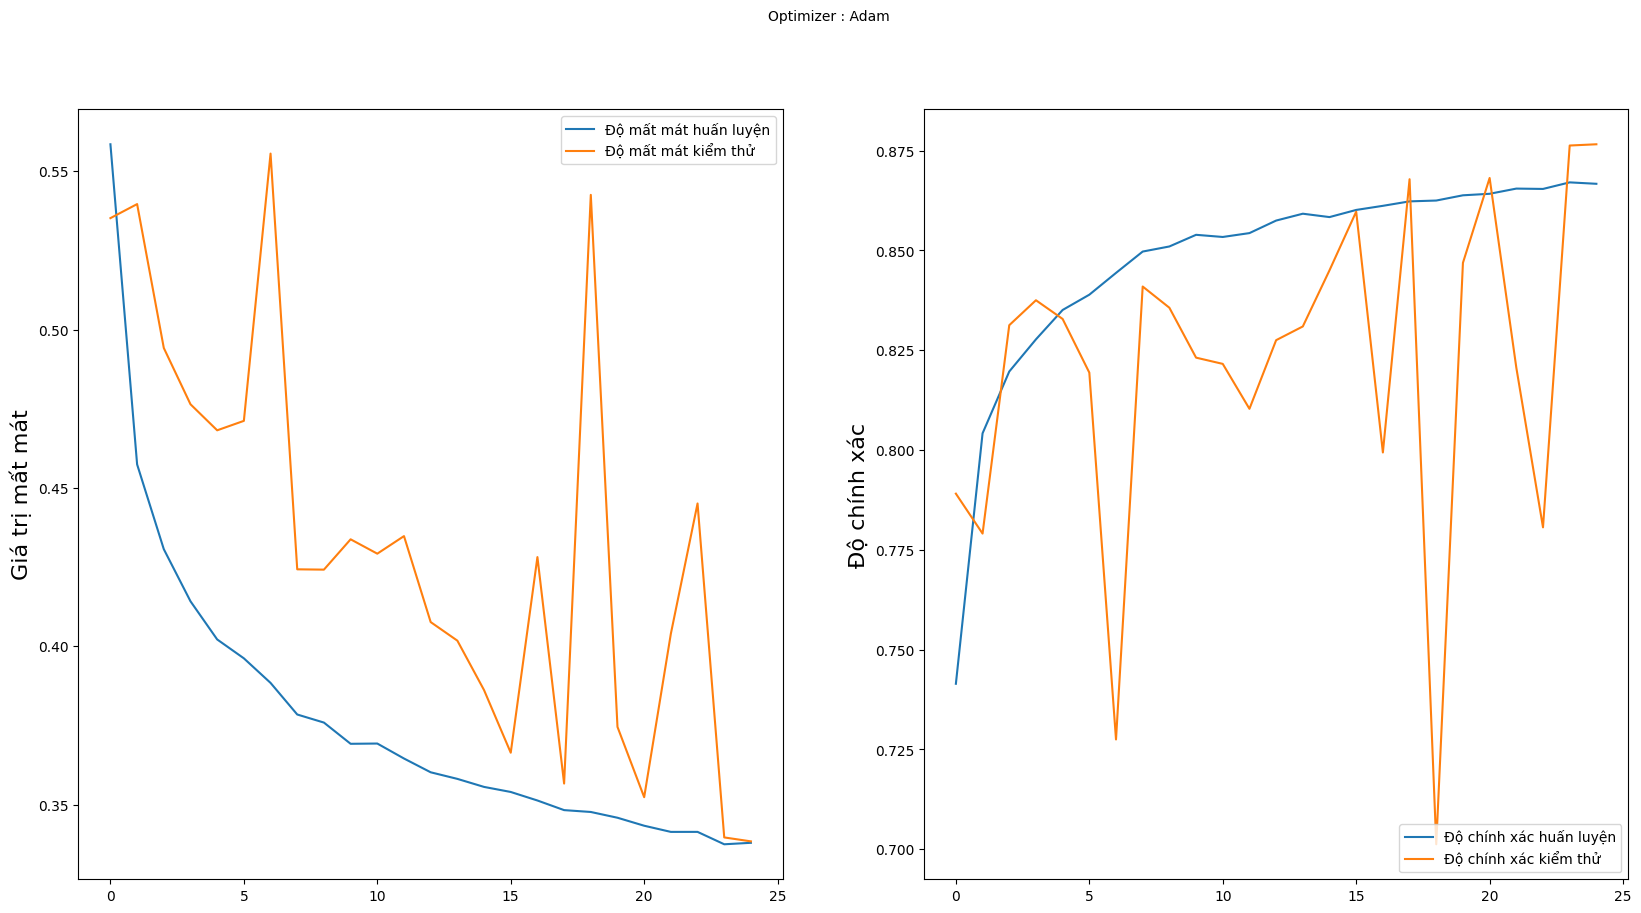

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Giá trị mất mát', fontsize=16)
plt.plot(history.history['loss'], label='Độ mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Độ mất mát kiểm thử')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Độ chính xác', fontsize=16)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm thử')
plt.legend(loc='lower right')
plt.show()

26/26 [==============================] - 3s 78ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

      Closed       0.49      0.57      0.53      1566
        Open       0.52      0.44      0.48      1657

    accuracy                           0.50      3223
   macro avg       0.51      0.51      0.50      3223
weighted avg       0.51      0.50      0.50      3223



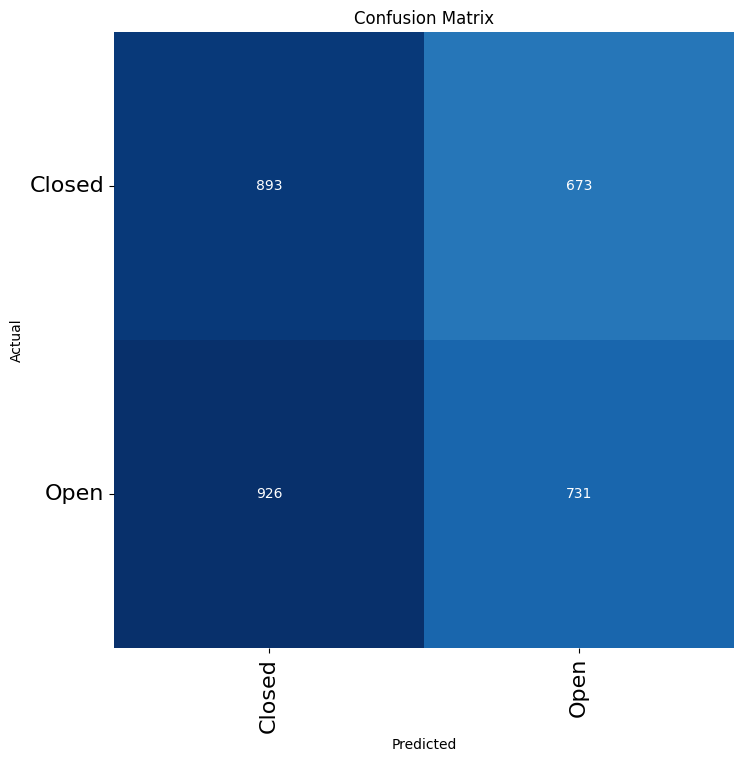

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_set, model)

26/26 [==============================] - 2s 82ms/step
Confusion Matrix


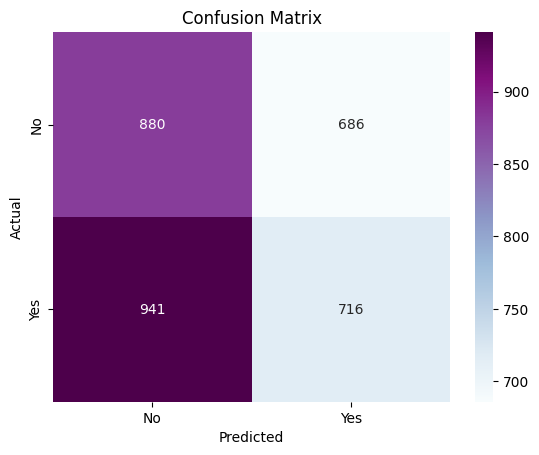

In [22]:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
qd = confusion_matrix(test_set.classes, y_pred)
ax = sns.heatmap(qd, annot=True, cmap="BuPu",fmt='g')
ax.set_title("Confusion Matrix");
ax.set_xlabel("Predicted")
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()